# Attrition Prediction Task

For this overall task, I will be going by this methodology:
1. Exploratory Data Analysis
2. Feature Engineering/Selection
3. Model Building
4. Model Evaluation

### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report

In [2]:
# read excel into dataframe
attrition_df = pd.read_excel("Worksheet in NHG GHR Task Feb 2025.xlsx")

In [3]:
# first 5 rows of dataframe
attrition_df.head()

,EmployeeNumber,Attrition,Age,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,1102,Sales,1,2,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,279,Research & Development,8,1,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,4,Yes,37,1373,Research & Development,2,2,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,5,No,33,1392,Research & Development,3,4,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,7,No,27,591,Research & Development,2,1,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# summary info of dataframe
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Age                       1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [5]:
# categorical variables
categorical_var = attrition_df.dtypes[attrition_df.dtypes == "object"]
print(f"Categorical Variables: \n{categorical_var}")

Categorical Variables: 
Attrition        object
Department       object
Gender           object
JobRole          object
MaritalStatus    object
OverTime         object
dtype: object


In [6]:
attrition_df.nunique()

EmployeeNumber              1470
Attrition                      2
Age                           43
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [7]:
# Fix attrition datatype
attrition_df['Attrition'] = attrition_df['Attrition'].map({'Yes': True, 'No': False})

In [8]:
attrition_df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# check for missing values
attrition_df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Task 1

***Calculate and compare the attrition rates by department. The attrition rate should be calculated as (Number of employees who left the company) / (Total number of employees). Please generate an appropriate data visualization chart to represent your findings.***

In [10]:
# overall attrition distribution
attrition_df['Attrition'].value_counts()

Attrition
False    1233
True      237
Name: count, dtype: int64

In [11]:
# overall attrition distribution in percentage
attrition_df['Attrition'].value_counts() / len(attrition_df)

Attrition
False    0.838776
True     0.161224
Name: count, dtype: float64

In [12]:
# number of attritions for each department
attrition_df[attrition_df["Attrition"] == True].groupby("Department").size()

Department
Human Resources            12
Research & Development    133
Sales                      92
dtype: int64

In [13]:
# total number of employees for each department
attrition_df.groupby(["Department"]).size()

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

In [14]:
attrition_series = attrition_df[attrition_df["Attrition"] == 1].groupby("Department").size() / attrition_df.groupby(["Department"]).size()
attrition_rate_df = attrition_series.reset_index(name='AttritionRate')
attrition_rate_df

,Department,AttritionRate
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


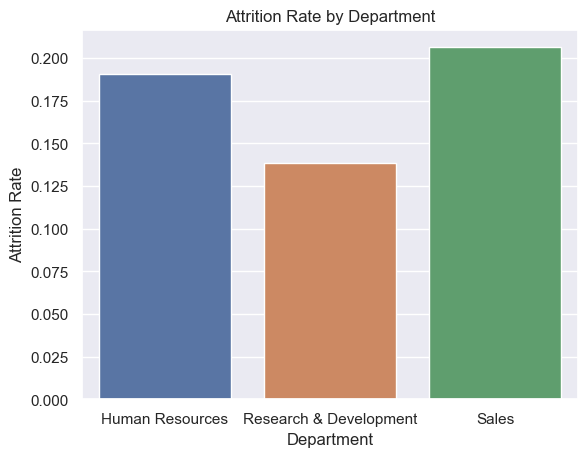

In [15]:
sns.set_theme(style="darkgrid")
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate', hue="Department")
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.xlabel("Department")
plt.show()

**From the bar chart, we are able to observe that the department with the highest attrition rate is Sales (0.206), followed by Human Resource (0.190) and Research & Development (0.138).**

### Task 2

***Uncover the factors that lead to employee attrition. Explore how each feature in the dataset correlates with attrition and provide insights on your findings.***

Numerical Features: Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, Job Level, Job Satisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

Categorical Features: Department, Gender, JobRole, MaritalStatus, OverTime

#### Exploratory Data Analysis

##### Individual Factors (Age, DistanceFromHome, Education, Gender, Marital Status, NumCompaniesWorked, StockOptions, TotalWorkingYears)

###### Age

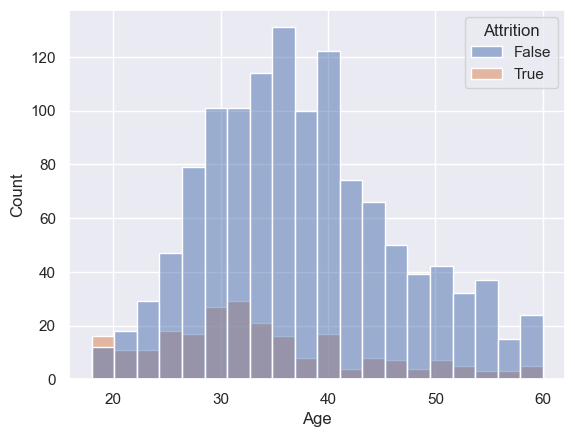

In [16]:
sns.histplot(attrition_df, x="Age", hue="Attrition", bins=20, multiple="layer")
plt.show()

From the histogram, we see that the distribution of staff ages is relatively normal. More importantly, we note that staff around age 30 have the highest number of attritions. However, this does not accurately reflect the attrition rate by Age.

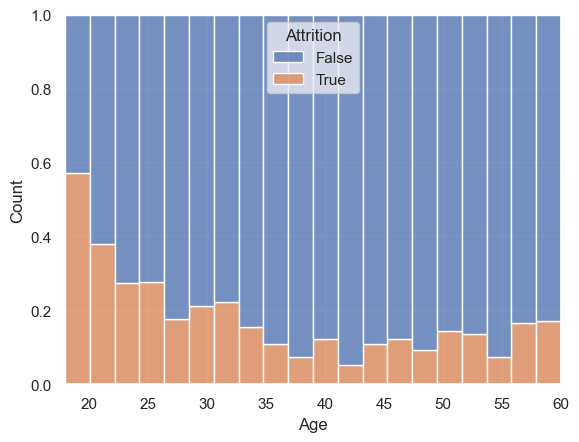

In [17]:
sns.histplot(attrition_df, x="Age", hue="Attrition", bins=20, multiple="fill")
plt.show()

Now, from this filled histogram plot we see that younger staff around age 30 and below tend to have higher attrition rates as compared to older staff.

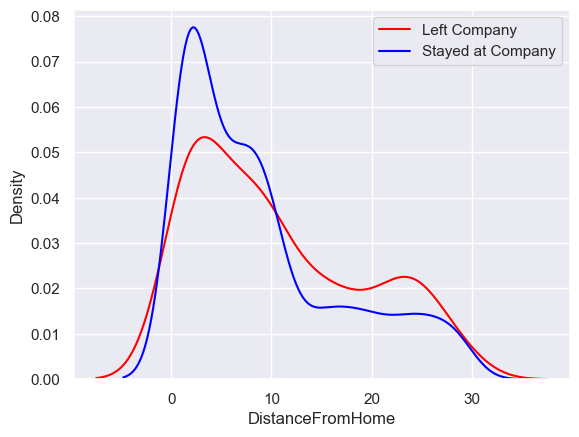

In [18]:
sns.kdeplot(attrition_df[attrition_df["Attrition"] == True]["DistanceFromHome"], label="Left", color="red")
sns.kdeplot(attrition_df[attrition_df["Attrition"] == False]["DistanceFromHome"], label="Stayed",color="blue")
plt.legend(labels=["Left Company", "Stayed at Company"])
plt.show()

Although we might expect employees who live further away to have higher attrition, it does not seem to be the case. The red curve (attrition employees) is not left/negatively skewed, and the distribution seems relatively similar regardless of attrition.

###### Education

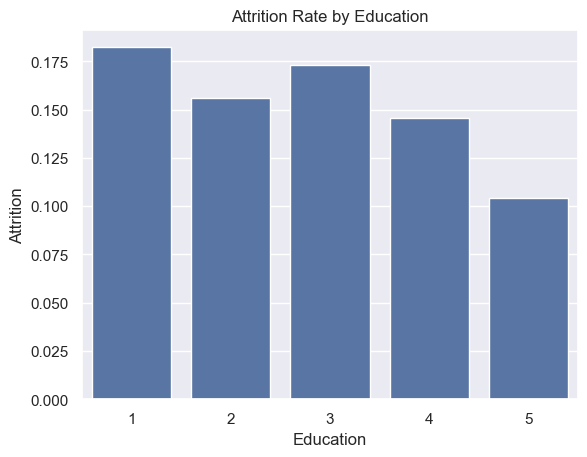

In [19]:
attrition_rates_by_education = attrition_df.groupby("Education")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_education, x="Education", y="Attrition")
plt.title("Attrition Rate by Education")
plt.show()

From the above bar chart of attrition rates across education levels, we see that staff with lower education have higher attrition than staff with higher education. This could suggest factors such as lack of career growth for lower-educated staff or career stability for higher-educated staff.

###### Gender & Marital Status

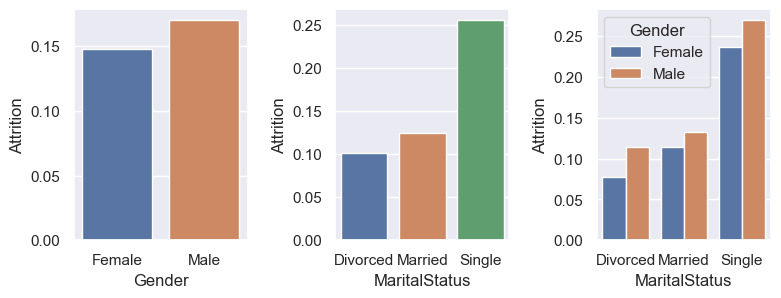

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
attrition_rates_by_gender = attrition_df.groupby("Gender")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_gender, x="Gender", y="Attrition", hue="Gender", ax=axes[0])
attrition_rates_by_maritalstatus = attrition_df.groupby("MaritalStatus")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_maritalstatus, x="MaritalStatus", y="Attrition", hue="MaritalStatus", ax=axes[1])
attrition_rates_by_gender_maritalstatus = attrition_df.groupby(["Gender", "MaritalStatus"])["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_gender_maritalstatus, x="MaritalStatus", y="Attrition", hue="Gender", ax=axes[2])
plt.subplots_adjust(wspace=0.5)
plt.show()

From the bar chart, we see that Male staff have a slightly higher rate of attrition. More noticeably, Single staff have a higer rate of attrition. This may be due to Single individuals chasing career growth as opposed to stability.

###### NumCompaniesWorked

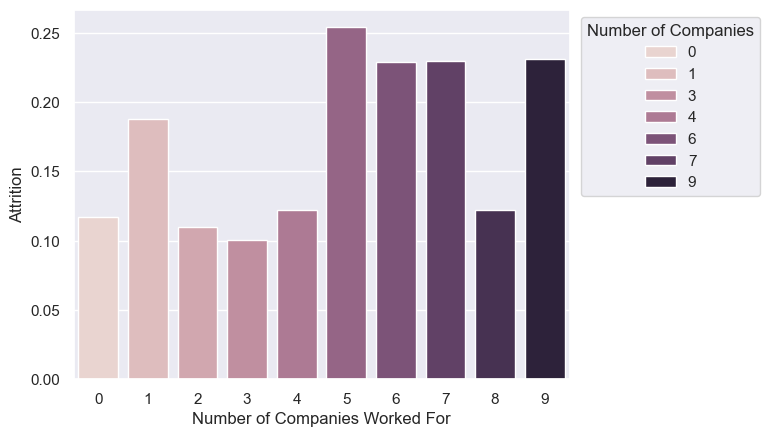

In [21]:
attrition_rates_by_numcompaniesworked = attrition_df.groupby("NumCompaniesWorked")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_numcompaniesworked, x="NumCompaniesWorked", y="Attrition", hue="NumCompaniesWorked")
plt.legend(title="Number of Companies", bbox_to_anchor=(1.4, 1), loc='upper right')
plt.xlabel("Number of Companies Worked For")
plt.show()

From the above chart, we see that staff who have worked for more companies tend to have higher attrition rates. This could be due to such staff having a history of job-hopping and continuing to do so.

###### StockOptionLevel

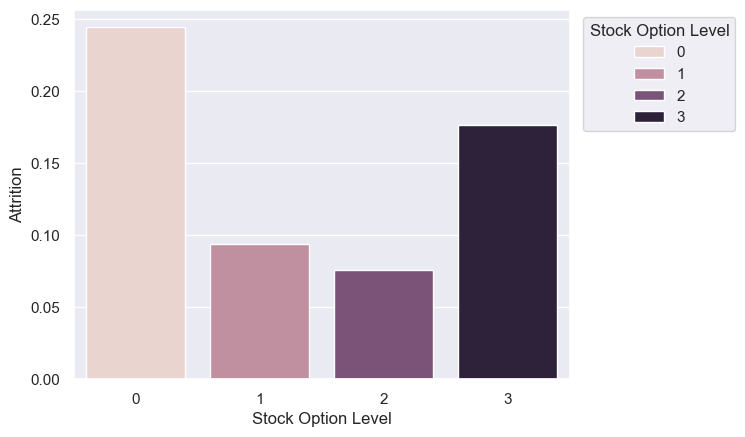

In [22]:
attrition_rates_by_stockoptionlevel = attrition_df.groupby("StockOptionLevel")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_stockoptionlevel, x="StockOptionLevel", y="Attrition", hue="StockOptionLevel")
plt.legend(title="Stock Option Level", bbox_to_anchor=(1.35, 1), loc='upper right')
plt.xlabel("Stock Option Level")
plt.show()

Although it is not clear about the true meaning of StockOptionLevel, we see that staff with 0 and 3 in StockOptionLevel have significantly higher attrition rates.

###### Total Working Years

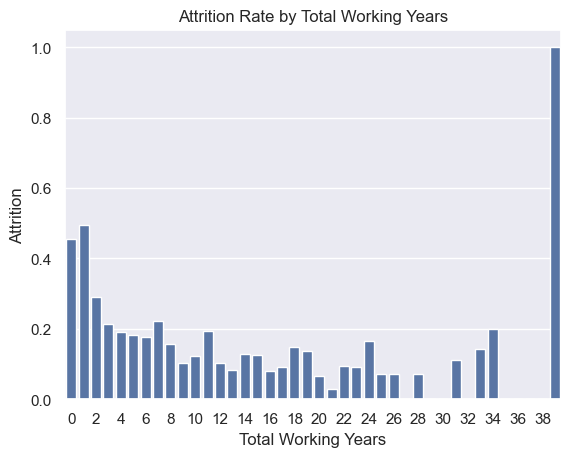

In [23]:
attrition_rates_by_totalworkingyears = attrition_df.groupby("TotalWorkingYears")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_totalworkingyears, x="TotalWorkingYears", y="Attrition")
# plt.legend(title="Total Working Years", bbox_to_anchor=(1.4, 1), loc='upper right')
plt.xlabel("Total Working Years")
max_years = max(attrition_rates_by_totalworkingyears['TotalWorkingYears'])
plt.xticks(ticks=range(max_years),
           labels=[v if i%2 == 0 else '' for i, v in enumerate(attrition_rates_by_totalworkingyears['TotalWorkingYears'])])
plt.title("Attrition Rate by Total Working Years")
plt.show()

From the bar chart, we see that generally, staff with lower total working years have a higher attrition rate. However, there is an outlier where staff with 40 years worked have 100% attrition rate. This is likely due to the small number of staff having worked that long who left the company.

In [24]:
sum(attrition_df['TotalWorkingYears'] == max_years)

2

As expected, there are only 2 staff who worked that long, and both have left the company, possibly due to retirement.

##### Salary Factors (DailyRate, HourlyRate, MonthlyRate, MonthlyIncome, PercentSalaryHike)

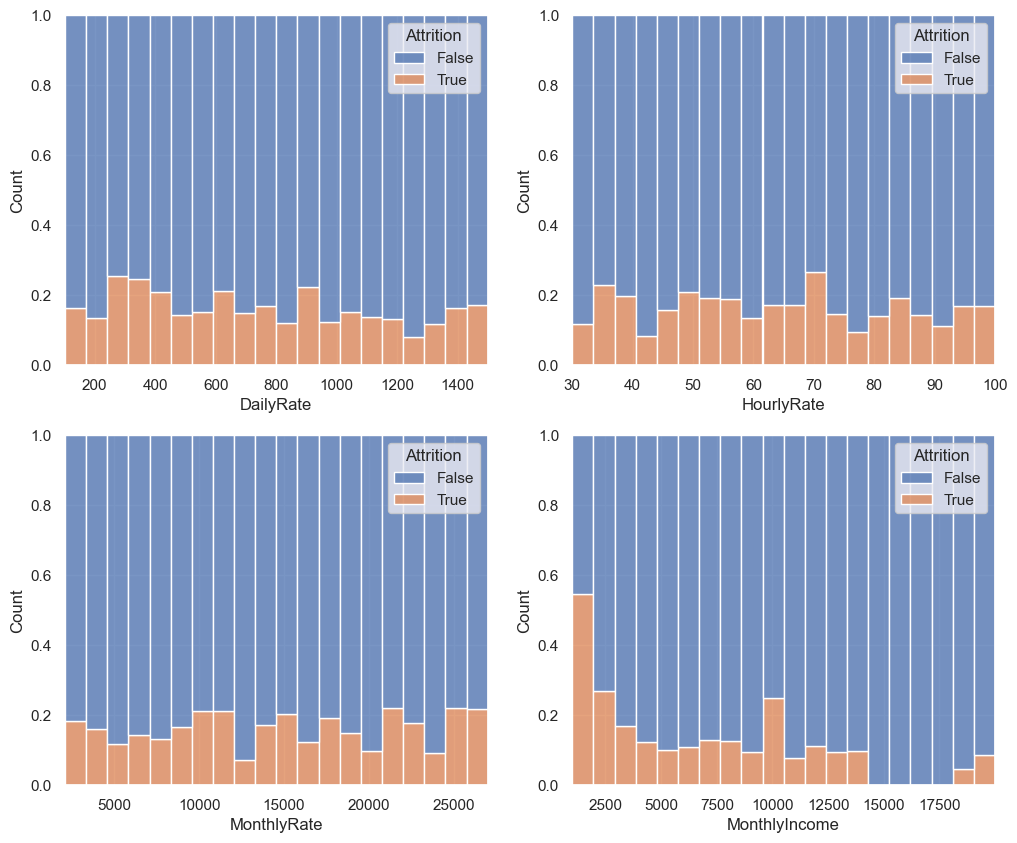

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(attrition_df, x="DailyRate", hue="Attrition", bins=20, multiple="fill", ax=axes[0,0])
sns.histplot(attrition_df, x="HourlyRate", hue="Attrition", bins=20, multiple="fill", ax=axes[0,1])
sns.histplot(attrition_df, x="MonthlyRate", hue="Attrition", bins=20, multiple="fill", ax=axes[1,0])
sns.histplot(attrition_df, x="MonthlyIncome", hue="Attrition", bins=20, multiple="fill", ax=axes[1,1])
plt.show()


When looking at the Daily, Hourly and Monthly Rates, we see the distribution of attrition is relatively similar. This makes sense as they are highly correlated and likely derivable from each other. Taking DailyRate for example, we see that the distribution of attrition rate is relatively even across the range.

When looking at Monthly Income however, we note that the attrition rate is higher amongst lower income staff.

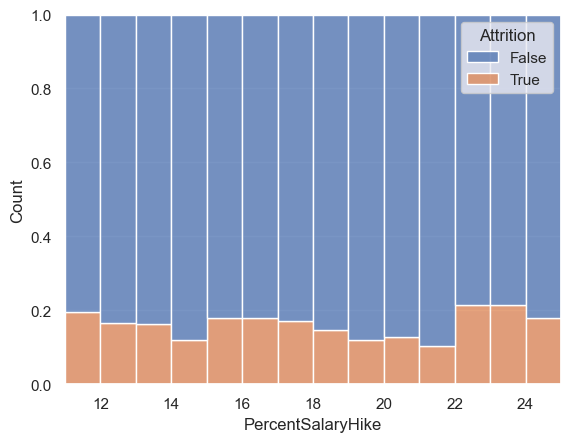

In [26]:
sns.histplot(attrition_df, x="PercentSalaryHike", hue="Attrition", multiple="fill")
plt.show()

With PercentSalaryHike, we also note the relatively even distribution in attrition rates. Other than MonthlyIncome, it appears that salary factors do not play a big part in employee attritions.

##### Job Factors

###### Job Environment (EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction)

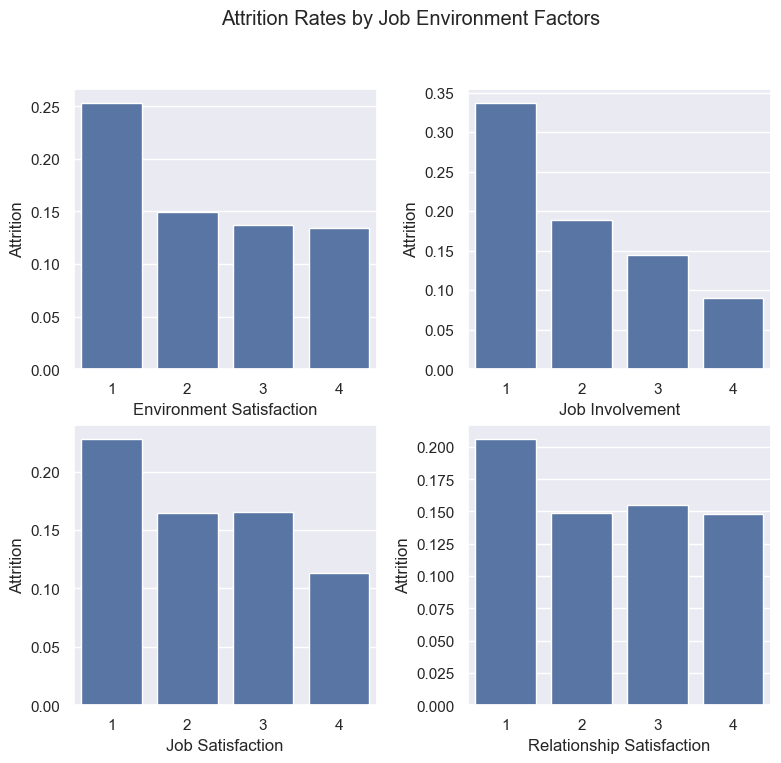

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(9, 8))
attrition_rates_by_environment = attrition_df.groupby("EnvironmentSatisfaction")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_environment, x="EnvironmentSatisfaction", y="Attrition", ax=axes[0,0])
axes[0, 0].set_xlabel("Environment Satisfaction")

attrition_rates_by_involvement = attrition_df.groupby("JobInvolvement")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_involvement, x="JobInvolvement", y="Attrition", ax=axes[0,1])
axes[0, 1].set_xlabel("Job Involvement")

attrition_rates_by_jobsatisfaction = attrition_df.groupby("JobSatisfaction")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_jobsatisfaction, x="JobSatisfaction", y="Attrition", ax=axes[1,0])
axes[1, 0].set_xlabel("Job Satisfaction")

attrition_rates_by_relationshipsatisfaction = attrition_df.groupby("RelationshipSatisfaction")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_relationshipsatisfaction, x="RelationshipSatisfaction", y="Attrition", ax=axes[1,1])
axes[1, 1].set_xlabel("Relationship Satisfaction")

fig.suptitle("Attrition Rates by Job Environment Factors")
plt.subplots_adjust(wspace=0.3)
plt.show()

A conducive job environment can have a big influence on staff staying or leaving the job. As expected from the above charts, for all 4 job environment factors, staff who gave poor ratings have higher attrition rates.

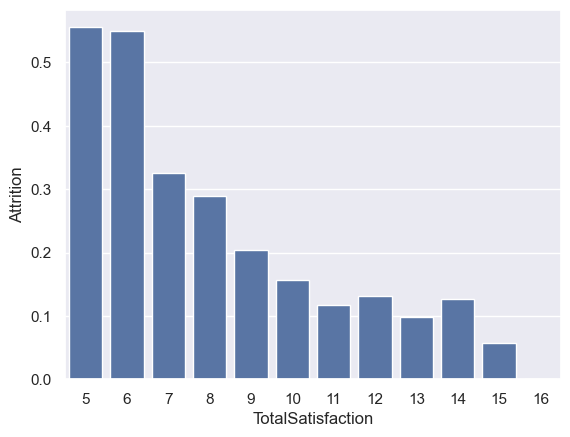

In [28]:
attrition_df['TotalSatisfaction'] = attrition_df["EnvironmentSatisfaction"] + attrition_df["JobInvolvement"] + attrition_df["JobSatisfaction"] + attrition_df["RelationshipSatisfaction"]
attrition_rates_by_totalsatisfaction = attrition_df.groupby("TotalSatisfaction")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_totalsatisfaction, x="TotalSatisfaction", y="Attrition")
plt.show()

When we sum up the 4 different satisfaction factors to get a TotalSatisfaction score, the picture becomes much clearer. As expected, staff with poor scores across the 4 factors would have lower TotalSatisfaction scores and have significantly higher attrition rates.

###### Job Scope (JobLevel, JobRole, Overtime, PerformanceRating, TrainingTimesLastYear, WorkLifeBalance)

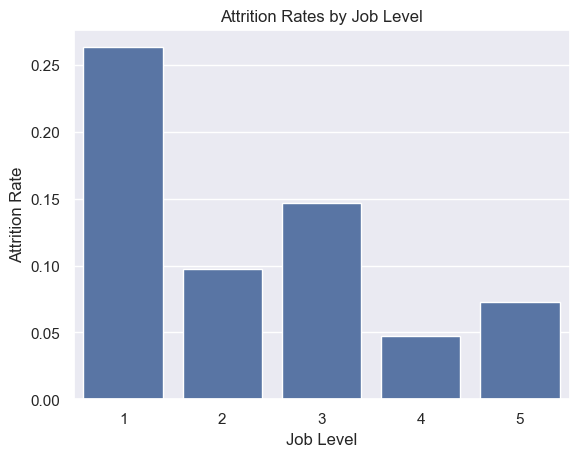

In [29]:
attrition_rates_by_joblevel = attrition_df.groupby("JobLevel")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_joblevel, x="JobLevel", y="Attrition")
plt.title("Attrition Rates by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Attrition Rate")
plt.show()

From the above chart, we see that generally, staff from lower job levels tend to have higher rates of attrition, perhaps due to seeking career advancement elsewhere.

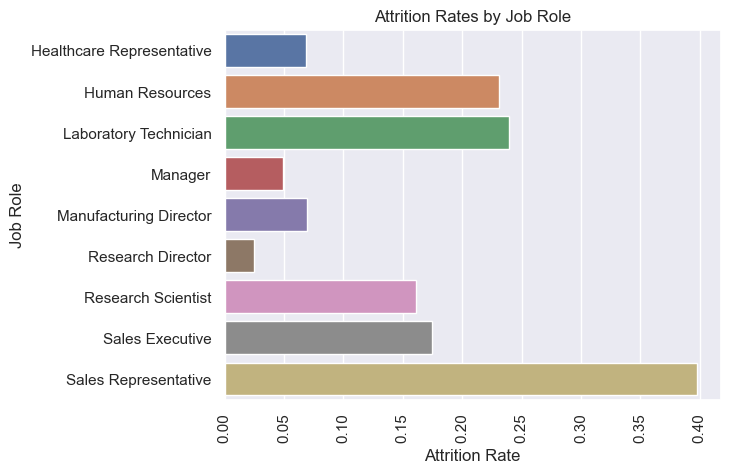

In [30]:
attrition_rates_by_jobrole = attrition_df.groupby("JobRole")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_jobrole, y="JobRole", x="Attrition", hue="JobRole")
plt.title("Attrition Rates by Job Role")
plt.ylabel("Job Role")
plt.xlabel("Attrition Rate")
plt.xticks(rotation=90)
plt.show()

When looking across the different job roles, we see that the top 5 roles with highest attrition are Sales Representatives, Laboratory Technicians, Human Resources, Sales Executives and Research Scientists. On the other hand, managerial roles tend to have lower attrition rates. This is in line with our previous observation where staff of lower job levels have a higher tendency to leave.

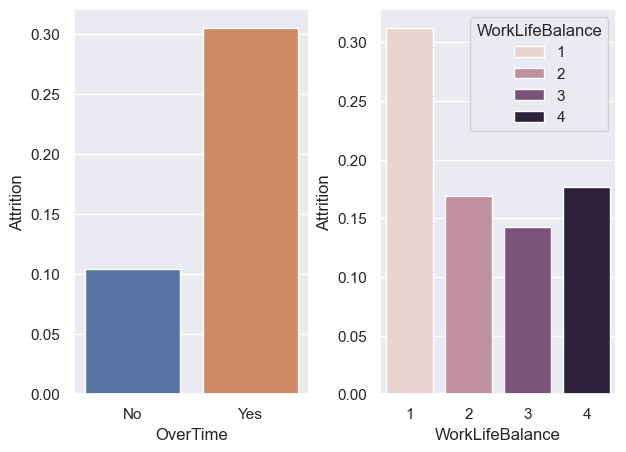

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

attrition_rates_by_overtime = attrition_df.groupby("OverTime")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_overtime, x="OverTime", y="Attrition", hue="OverTime", ax=axes[0])

attrition_rates_by_wlb = attrition_df.groupby("WorkLifeBalance")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_wlb, x="WorkLifeBalance", y="Attrition", hue="WorkLifeBalance", ax=axes[1])

plt.subplots_adjust(wspace=0.3)

When comparing OverTime and WorkLifeBalance, it is clear and expected that staff who work overtime and have poor WorkLifeBalance have the highest attrition rates.

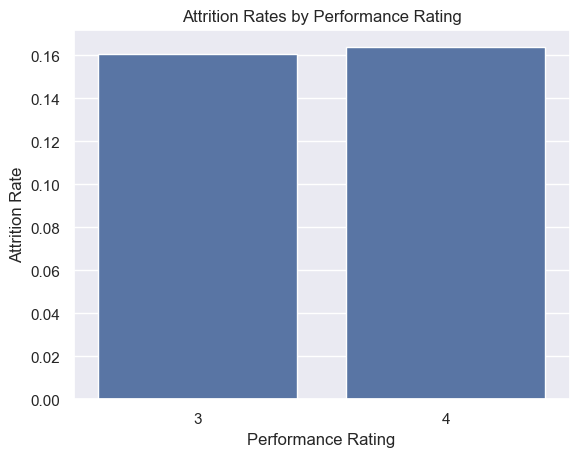

In [32]:
attrition_rates_by_performance = attrition_df.groupby("PerformanceRating")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_performance, x="PerformanceRating", y="Attrition")
plt.title("Attrition Rates by Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Attrition Rate")
plt.show()

Surprisingly, there are only 2 unique values for performance rating, either 3 or 4, with no staff having lower ratings. Regardless, the attrition rates for staff with either 3 or 4 are relatively similar.

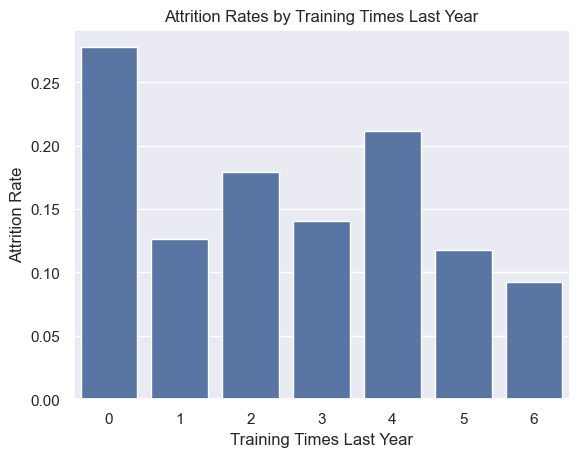

In [33]:
attrition_rates_by_trainingtimes = attrition_df.groupby("TrainingTimesLastYear")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_trainingtimes, x="TrainingTimesLastYear", y="Attrition")
plt.title("Attrition Rates by Training Times Last Year")
plt.xlabel("Training Times Last Year")
plt.ylabel("Attrition Rate")
plt.show()

From the chart, we see that staff with lower training times last year tend to have higher attrition rates whilst staff with the most training times had lower attrition rates. This could be due to an importance placed on upskilling and growth opportunities by staff.

###### Job Loyalty (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager)

In [34]:
# group years into bins for easier comparison
bins = [0, 2, 5, 10, 20, max(attrition_df["YearsAtCompany"]) + 1]
bins_2 = [0, 2, 5, 10, 15, 20]
labels = ["0-2 years", "3-5 years", "6-10 years", "11-19 years", "20+ years"]
labels_2 = ["0-2 years", "3-5 years", "6-10 years", "11-14 years", "15+ years"]
attrition_df["YearsAtCompanyGroup"] = pd.cut(attrition_df["YearsAtCompany"], bins=bins, labels=labels, right=False)
attrition_df["YearsInCurrentRoleGroup"] = pd.cut(attrition_df["YearsInCurrentRole"], bins=bins_2, labels=labels_2, right=False)
attrition_df["YearsSinceLastPromotionGroup"] = pd.cut(attrition_df["YearsSinceLastPromotion"], bins=bins_2, labels=labels_2, right=False)
attrition_df["YearsWithCurrManagerGroup"] = pd.cut(attrition_df["YearsWithCurrManager"], bins=bins_2, labels=labels_2, right=False)

C:\Users\bryan\AppData\Local\Temp\ipykernel_23124\2357338638.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rates_by_yearsatcompany = attrition_df.groupby("YearsAtCompanyGroup")["Attrition"].mean().reset_index()
C:\Users\bryan\AppData\Local\Temp\ipykernel_23124\2357338638.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rates_by_yearsincurrentrole = attrition_df.groupby("YearsInCurrentRoleGroup")["Attrition"].mean().reset_index()
C:\Users\bryan\AppData\Local\Temp\ipykernel_23124\2357338638.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True

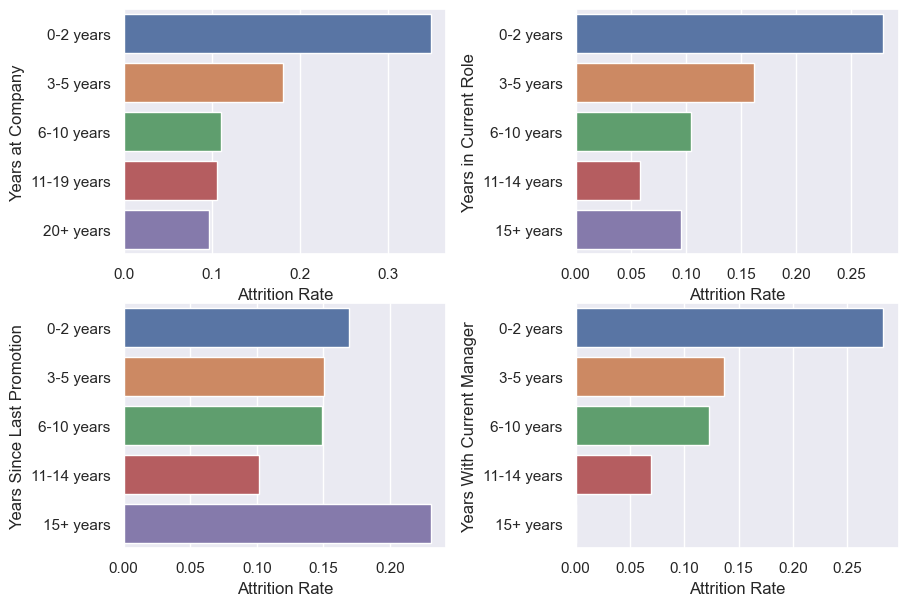

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

attrition_rates_by_yearsatcompany = attrition_df.groupby("YearsAtCompanyGroup")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_yearsatcompany, y="YearsAtCompanyGroup", x="Attrition", hue="YearsAtCompanyGroup", ax=axes[0, 0])
axes[0,0].set_xlabel("Attrition Rate")
axes[0,0].set_ylabel("Years at Company")

attrition_rates_by_yearsincurrentrole = attrition_df.groupby("YearsInCurrentRoleGroup")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_yearsincurrentrole, y="YearsInCurrentRoleGroup", x="Attrition", hue="YearsInCurrentRoleGroup", ax=axes[0, 1])
axes[0,1].set_xlabel("Attrition Rate")
axes[0,1].set_ylabel("Years in Current Role")

attrition_rates_by_yearssincelastpromotion = attrition_df.groupby("YearsSinceLastPromotionGroup")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_yearssincelastpromotion, y="YearsSinceLastPromotionGroup", x="Attrition", hue="YearsSinceLastPromotionGroup", ax=axes[1, 0])
axes[1,0].set_xlabel("Attrition Rate")
axes[1,0].set_ylabel("Years Since Last Promotion")

attrition_rates_by_yearswithcurrmanager= attrition_df.groupby("YearsWithCurrManagerGroup")["Attrition"].mean().reset_index()
sns.barplot(data=attrition_rates_by_yearswithcurrmanager, y="YearsWithCurrManagerGroup", x="Attrition", hue="YearsWithCurrManagerGroup", ax=axes[1, 1])
axes[1,1].set_xlabel("Attrition Rate")
axes[1,1].set_ylabel("Years With Current Manager")
plt.subplots_adjust(wspace=0.4)

When looking at job loyalty factors, we notice some interesting trends. Generally, staff who spend fewer years at the company, their current role or with their current manager tend to have higher attrition rates. This could be due to such employees already having the tendency to job-hop, whilst staff who have already stayed for longer and value stability prefer to continue long-term.

What is interesting however, is that the trend for Years Since Last Promotion is unclear. Some would expect promotion to be a big factor in staff deciding to stay or leave for better opportunities. From the chart, we see that staff who had their last promotion 15+ years ago have the highest attrition rates, followed by 0-2 years. This is likely due to outliers, as there are very few staff (13 out of 1470) having been last promoted 15+ years ago and have left possibly due to retirement. Ignoring which, the trend of staff who spend fewer years at the company/role having higher attrition remains.

##### Overall Findings

Firstly, it appears that salary factors generally do not have a big impact on attrition rates. Apart from monthly income, where staff with lower monthly incomes have higher attrition rates, there seems to be no obvious trend in attrition rates across the range of salaries.

Secondly, when looking at individual factors, the most influential factors include age, education, gender, marital status, number of companies worked for, stock option level and total working years. Most notably, younger staff, staff with lower education levels, single staff, staff with a history of working for many companies, with lower stock option levels and lower total working years have the highest attrition rates.

When looking at job factors, I categorised them into job environment, job scope and job loyalty. Across these 3 categories, there are quite interesting findings.

For job environment, across all 4 factors, there is a clear trend that poor job environment factors such as enviornment and job satisfaction lead to higher attrition rates. This is further the case when we sum up these 4 factors to get a score out of 16. Staff with poor Total Satisfaction scores have significantly higher attrition rates.

For job scope, we see that staff in lower job levels or non-managerial roles have higher attrition rates. Factors such as overtime and work life balance show an obvious increase in attrition when staff work over time or have poor work-life balance. A lack of training times also leads to higher attrition rate.

When looking at job loyalty, unsurprisingly, staff who did not stay for long had higher attrition rates. Staff who had stayed for longer had lower attrition rates. However, the effect of promotions is not clear.

Overall, I would conclude by saying that job factors seem to have the biggest influence and clearest trend with attrition, whilst salary was not as significant in influencing attrition. This could largely be due to employees placing importance on job satisfaction, growth opportunities, working environment and overall career trajectory.


### Task 3

***Build and compare multiple machine learning models based on selected variables to predict if an employee is likely to leave the company or not. The target variable for this prediction is the "Attrition" column.***

#### Train-Test Split

To prevent data leakage and ensure our models perform well on unseen data, we will first split the dataset into training (80%) and testing (20%) sets.

In [36]:
y = attrition_df['Attrition']
X = attrition_df.drop("Attrition", axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=10)

#### Feature Engineering/Selection

Prior to training our machine learning models, we will do some simple feature engineering and select the best features for the models. As there are already around 30 features, our focus will be on feature selection to reduce overfitting for a more robust model.

###### Convert categorical OverTime feature to binary

In [38]:
X_train["OverTime"] = X_train["OverTime"].map({"No" : 0, "Yes": 1})
X_test["OverTime"] = X_test["OverTime"].map({"No" : 0, "Yes": 1})

###### Label Encoding of Categorical Features

In [39]:
categorical_features = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [40]:
for feature in categorical_features:
    label_encoder = LabelEncoder()
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    X_test[feature] = label_encoder.transform(X_test[feature])

###### Drop unnecessary columns

In [41]:
columns_to_drop = ['EmployeeNumber', 'StandardHours', 'YearsAtCompanyGroup', 'YearsInCurrentRoleGroup', 'YearsSinceLastPromotionGroup', 'YearsWithCurrManagerGroup']
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

In [42]:
# calculate correlation for features (drop features with very low correlation)
train_attrition_df = pd.concat([X_train, y_train], axis=1)
corr_matrix = train_attrition_df.corr()
attrition_corr = corr_matrix['Attrition'].abs().sort_values(ascending=False)
print(f"Absolute correlation (ignoring positive or negative): \n{attrition_corr}")

Absolute correlation (ignoring positive or negative): 
Attrition                   1.000000
OverTime                    0.251863
JobLevel                    0.189747
TotalSatisfaction           0.181190
TotalWorkingYears           0.177299
MonthlyIncome               0.176525
YearsInCurrentRole          0.173364
Age                         0.164331
YearsWithCurrManager        0.161606
MaritalStatus               0.152426
YearsAtCompany              0.149355
JobInvolvement              0.137744
StockOptionLevel            0.129184
EnvironmentSatisfaction     0.101902
JobSatisfaction             0.097663
WorkLifeBalance             0.082327
DistanceFromHome            0.074650
JobRole                     0.067177
DailyRate                   0.060604
Department                  0.055873
TrainingTimesLastYear       0.053298
Education                   0.051217
NumCompaniesWorked          0.046117
RelationshipSatisfaction    0.045356
YearsSinceLastPromotion     0.044863
Gender              

In [43]:
X_train = X_train.drop("PerformanceRating", axis=1)
X_test = X_test.drop("PerformanceRating", axis=1)

In [44]:
print(f"Number of columns remaining: {len(X_train.columns)}")

Number of columns remaining: 28


#### Model Training

For this classification task, I have picked 3 popularly used models: RandomForest, LogisticRegression and LightGBM.

###### Random Forest

In [45]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

###### Logistic Regression

In [46]:
log_reg_model = LogisticRegression(random_state=10)
log_reg_model.fit(X_train, y_train)

c:\Users\bryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

###### LightGBM

In [47]:
lgb_model = lgb.LGBMClassifier(random_state=10)
lgb_model.fit(X_train, y_train)

c:\Users\bryan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\bryan\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 178, number of negative: 924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 1102, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161525 -> initscore=-1.646929
[LightGBM] [Info] Start training from score -1.646929


LGBMClassifier(random_state=10)

### Task 4

***Evaluate and compare the performance of your machine learning models. Explain your choice of evaluation metrics and why they are appropriate for this task.***

#### Model Evaluation

###### Prediction on Test Set

In [48]:
rf_pred = rf_model.predict(X_test)
log_reg_pred = log_reg_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)

###### F1-Scores

In the case of this dataset, as the dataset is highly imbalanced with only 16.1% of staff leaving the company, F1-score would be a suitable metric. It balances both precision and recall, which ensures the model is able to capture most staff who would leave, as well as being precise in positive predictions to avoid false positives of staff who do not intend to leave. Accuracy would be unsuitable, as a model that is only good at identifying non-attrition cases would still achieve a misleadingly high accuracy score.

In [49]:
print(f"Random Forest F1 Score: {f1_score(y_test, rf_pred)}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, log_reg_pred)}")
print(f"LightGBM F1 Score: {f1_score(y_test, lgb_pred)}")

Random Forest F1 Score: 0.2571428571428571
Logistic Regression F1 Score: 0.06451612903225806
LightGBM F1 Score: 0.43478260869565216


In [50]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       309
        True       0.61      0.34      0.43        59

    accuracy                           0.86       368
   macro avg       0.74      0.65      0.68       368
weighted avg       0.84      0.86      0.84       368



Based on the above F1-Scores, the LightGBM model gives us the best performance with an F1-Score of 0.44. However, this score is still not satisfactory. This is most likely due to the highly imbalanced dataset. It can also be due to the model overfitting on the training set, with too many non-descriptive features.

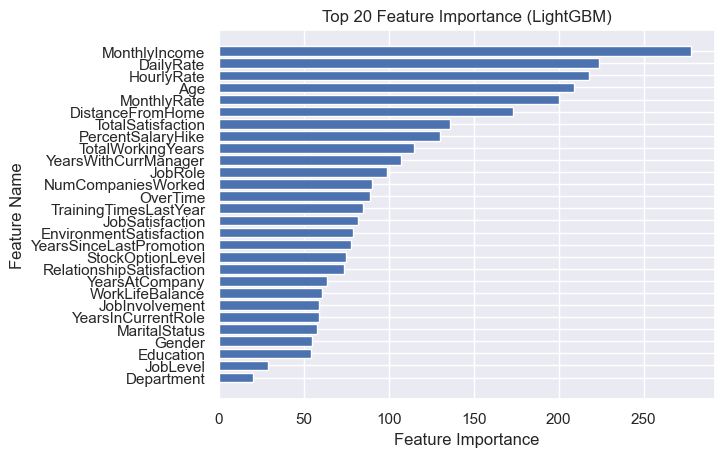

In [51]:
feature_importance = lgb_model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(np.array(feature_names)[sorted_idx][:], feature_importance[sorted_idx][:])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 20 Feature Importance (LightGBM)")
plt.gca().invert_yaxis()
plt.show()

In [52]:
# Select Top 20 features
selected_features = np.array(feature_names)[sorted_idx][:20]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [53]:
# Retrain and test model with selected features
lgb_model.fit(X_train_selected, y_train)
lgb_pred_selected = lgb_model.predict(X_test_selected)
print(f"LightGBM (Top 25 Selected Features) F1 Score: {f1_score(y_test, lgb_pred_selected)}")

[LightGBM] [Info] Number of positive: 178, number of negative: 924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 1102, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161525 -> initscore=-1.646929
[LightGBM] [Info] Start training from score -1.646929
LightGBM (Top 25 Selected Features) F1 Score: 0.46808510638297873


In [54]:
print(classification_report(y_test, lgb_pred_selected))

              precision    recall  f1-score   support

       False       0.89      0.96      0.92       309
        True       0.63      0.37      0.47        59

    accuracy                           0.86       368
   macro avg       0.76      0.67      0.70       368
weighted avg       0.85      0.86      0.85       368



In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lgb_pred_selected)

0.6654050792606

When we plot the feature importances from the LightGBM model and select the top 20 features, we achieve an improved F1 Score of 0.46.

### Conclusion

From this task, we were able to analyse key trends in features that could lead to attrition, which allowed us to build a classification model in identifying staff who were likely to leave the company. However, due to time constraints, there are several limitations in this project and areas for improvement.

Firstly, as the dataset was highly imbalanced, the model had trouble identifying the positive target class. Some methods to address the class imbalance problem include over/undersampling, ensuring a more even distribution in the classes to better train the model to identify attrition cases.

Secondly, there was limited feature engineering done in this project. One area I would love to explore are feature interactions, especially between individual factors and job factors. For example, age is a big indicator of attrition, as younger staff tend to have higher attrition rates. When combined with job factors such as job satisfaction, job level or even salary factors, we may be able to uncover new trends or more descriptive features that the model is able to use to discern positive and negative cases.

Lastly, there is room for improvement in the models. We can improve the models by hyperparameter tuning to achieve better performance or explore model ensembling to combine various models together. There is also the option of exploring complex models such as neural networks, but may not be necessary for a simple classification task where traditional models suffice.